# **Random Forest**

## Objectives
* Describe conceptually the need to move beyond **Decision trees**.
* Explain **Random Forest** algorithm.
* Interpret the **feature importances** of a fitted model.
* Explain the pros and cons of random forest algorithm.
* Differentiate between **boosting** and **bagging** techniques.

## Recall Decision Trees.

>> Supposing you want to go out on holiday, but you are finding it pretty difficult to chosose a holiday destination? You decide to ask your friend *Andrew* to recommend you some travel desinations. Based on certain features such as you last vacation, if you did enjoy it or not, your budget and preferences, Andrew ends up recommending you to visit Hells Gate.

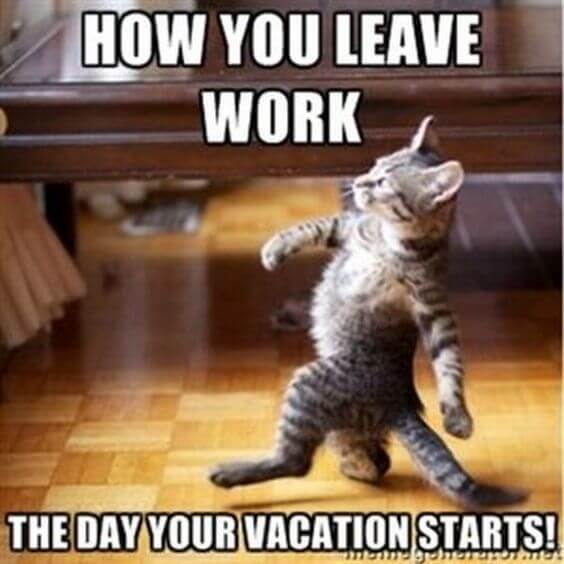


>> Here, *Andrew* is using the **Decision Tree technique** to provide you with a travel desination.

### Overview of Decision Tree Steps
 

1.   Organize data features and target.
2.   Make a decison(*a split*) using the features based on some metrics.
* Data is split into partitions via *branches*
3.  Continue on with each partition
4.  Keep doing that until a stopping condition is hit.
5.  To make predictions, run through the decision nodes.

### Picturing Decisons as a tree.

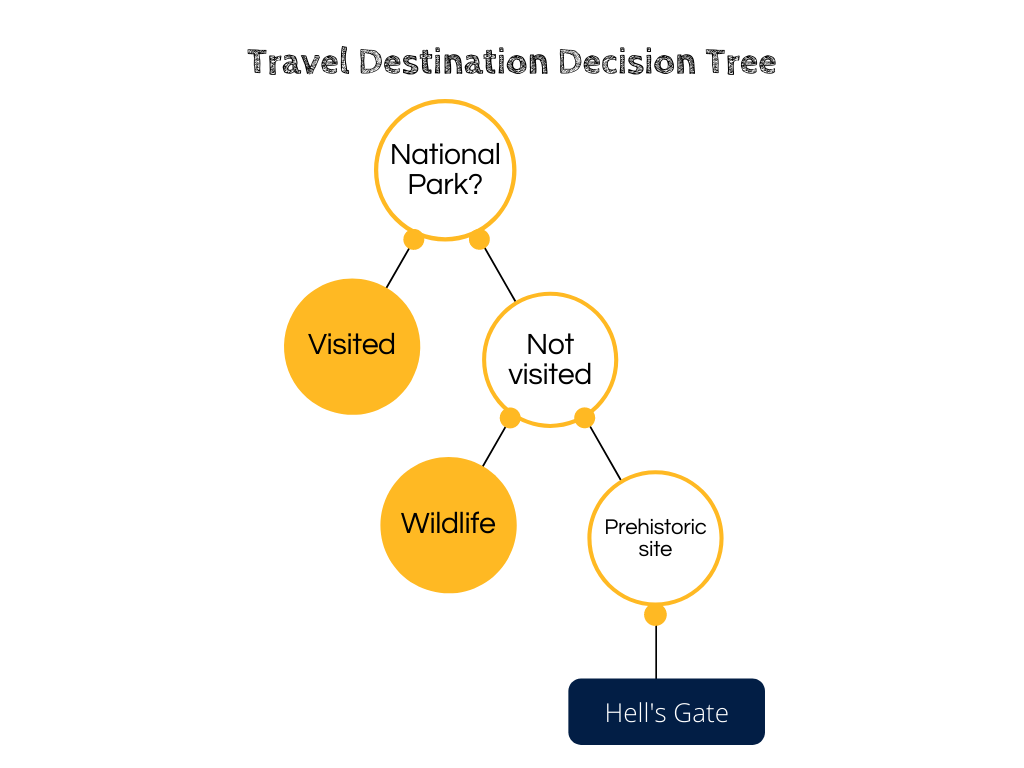

>> **Note:** The tree will be totally different depending on where the decision is made.

**Level Up: Random Forest**

>>You think Andrew's advice is a bit biased, and you ask your other friend *Pauline* the same question. She comes up with a **different** or **similar** recommendation, but you again considered it a dicey choice. You approach **n** number of friends and ask the to recommend a travel destination. Now you're up to some common places you can visit recommended by your friends, collect all the recommendations and aggregate them and decide to go with the place that uses the most votes. Here, you are using a **Random forest technique**.

>> The depeer you go, the more prone you are to **overfitting** in decision trees as you are more specified about your dataset in Decision Tree. Random forest tackles this by presenting you the product of Decision Tree’s simplicity and Accuracy through Randomness.

Decision tree algorithm is quite easy to understand and interpret. But often, a single tree is not sufficient for producing effective results. This is where the Random Forest algorithm comes into the picture.

## Introduction to Random Forest
Random forest is yet another powerful and most used **supervised learning algorithm**. Relies on **collecting various decision trees** to arrive at any solution. 

According to [wikipedia](https://en.wikipedia.org/wiki/Random_forest), Random forests or random decision forests is an **ensemble** learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. 

As the name suggests, it is a “forest” of trees! But why do we call it a "Random Forest"? That’s because it is a forest of randomly created decision trees. Each node in the decision tree works on a random subset of features to calculate the output. The random forest then combines the output of individual decision trees to generate the final output.
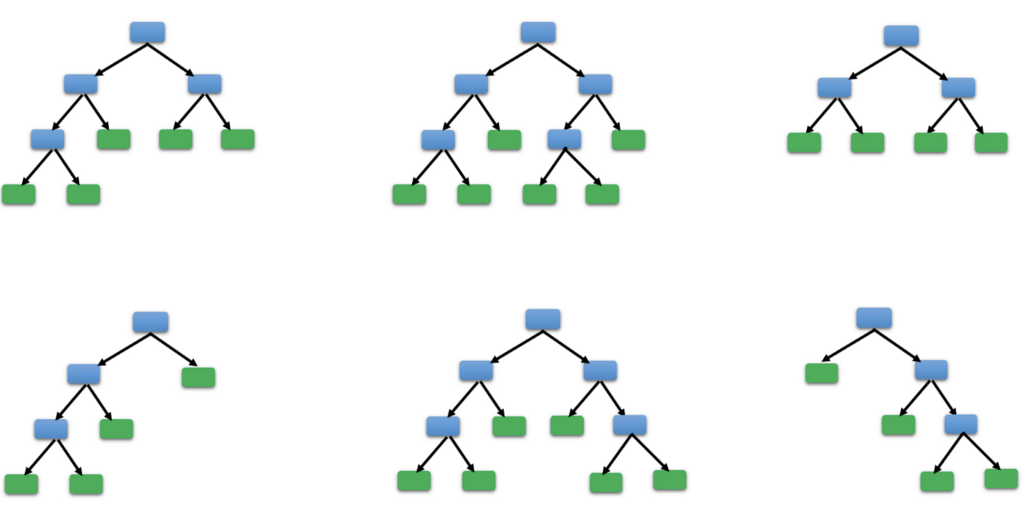


### Steps involved in random forest algorithm:

1. Randomly chose “k” features satisfying condition k < m.
2. Among the k features, calculate the root node by choosing a node with the highest Information gain.
3. Split the node into child nodes.
Repeat the previous steps n times.
4. You end up with a forest constituting n trees.
5. Perform Bootstrapping, i.e., combining the results of all Decision Trees.






## Clash of Random Forsest and Decision Tree in Code!
* Solving a classification problem using both a decision tree as well as a random forest then compare their results.

*Ready to code?*



### **Step1**: Loading the libraries and Dataset

* Importing the required libraries and the dataset:

In [78]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.datasets import load_iris
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split

# decison tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# random forest classifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [6]:
# Loading data
iris = load_iris()
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


* **Note**: Our data is organised already into features and target.

### **Step 2**: Data Preprocessing

* **Heads Up**: Here comes the most crucial part of any data science project -  **data preprocessing** and **feature engineering**. 
* **Note**: For learning purposes, we are going to work on the already pre processed data.

### Step 3: Creating Train and Test sets

* let’s split the dataset in an 80:20 ratio for training and test set respectively:

In [8]:
# Split data into train and test
X = iris.data[:, 0:4]
y = iris.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

* Let’s take a look at the shape of the created train and test sets:

In [9]:
# shape of data after splitting
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',y_train.shape)
print('Shape of Y_test=>',y_test.shape)

Shape of X_train=> (120, 4)
Shape of X_test=> (30, 4)
Shape of Y_train=> (120,)
Shape of Y_test=> (30,)


Awesome! Now we are ready for the next stage where we are going to build the decision tree and random forest models!

### **Step 4**: Training and Evaluating the Model
* Since we have both the training and testing sets, it’s time to train our models and classify the species.
* Check out the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) documentation 
* First, we will train a decision tree on this dataset:

In [34]:
# training the model
tree_clf = DecisionTreeClassifier(criterion = 'entropy', random_state=42)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

* Then make predictions and evaluate the model.

In [35]:
# make predictions
y_pred = tree_clf.predict(X_test)
y_pred

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [36]:
# calculate the accuracy score
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {0}".format(acc))

Accuracy: 93.33333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


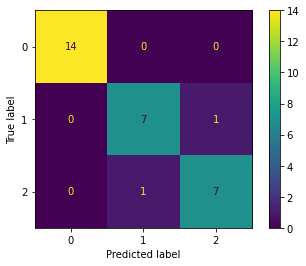

In [37]:
# display the confusion matrix results
plot_confusion_matrix(tree_clf, X_test, y_test);

* Evaluate this model using F1-Score.
* **Recall**: F1-Score is the harmonic mean of precision and recall given by the formula:

In [38]:
# Evaluation on Training set
pred_train = tree_clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train,pred_train, average='micro'))

Training Set Evaluation F1-Score=> 1.0


In [39]:
# Evaluation on Test set
pred_test = tree_clf.predict(X_test)
print('Training Set Evaluation F1-Score=>',f1_score(y_test, pred_test, average='micro'))

Training Set Evaluation F1-Score=> 0.9333333333333333


* Notice that the decison tree performs very well on in-sample evaluation, but its performance decreases on out-of-sample evaluation.
* At times the decrease is drasctic.
* Unfortunately, our decision tree model is **overfitting** on the training data.
* Will Random forest solve this issue?


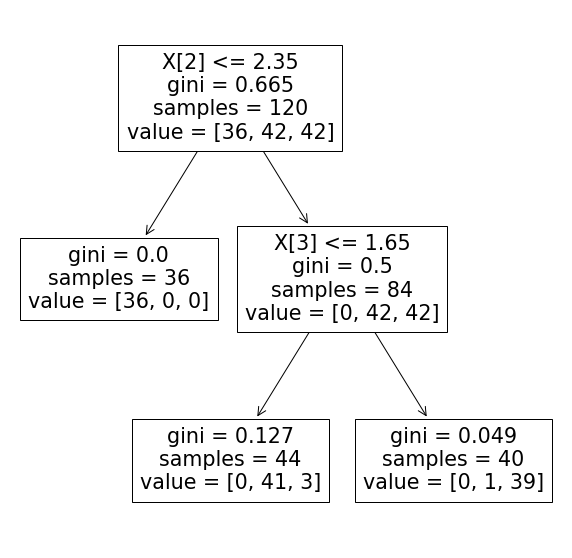

In [21]:
# using plot_tree from sklearn to display our tree
f, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree_clf, ax=ax);

* Let’s understand Random Forest with the help of code.



In [42]:
# training the model
forest_clf = RandomForestClassifier(criterion = 'entropy', random_state=42)

forest_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [43]:
# make predictions
y_fore_pred = tree_clf.predict(X_test)
y_fore_pred

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


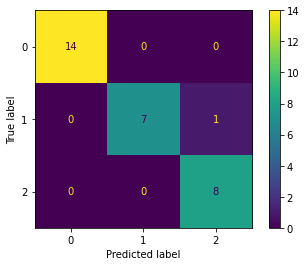

In [45]:
# display the confusion matrix results
plot_confusion_matrix(forest_clf, X_test, y_test);

In [48]:
# Evaluating on Training set
rfc_pred_train = forest_clf.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(y_train, rfc_pred_train,average='micro'))


Training Set Evaluation F1-Score=> 1.0


In [49]:
# Evaluating on Training set
rfc_pred_train = forest_clf.predict(X_test)
print('Training Set Evaluation F1-Score=>',f1_score(y_test, rfc_pred_train,average='micro'))


Training Set Evaluation F1-Score=> 0.9666666666666667


* Clearly the random forest model performed much better than the decision tree in the out-of-sample evaluation.

## Why the Random Forest Model did perform better than the Decision Tree?

* Let's take a look at the feature importance:

In [58]:
# sort the data with the help of feature importance
forest_clf.feature_importances_

array([0.09701246, 0.03417173, 0.42808547, 0.44073033])

In [60]:

imp_df = pd.DataFrame({
    "Varname": iris.feature_names,
    "Imp":forest_clf.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
3,petal width (cm),0.440730
2,petal length (cm),0.428085
0,sepal length (cm),0.097012
1,sepal width (cm),0.034172


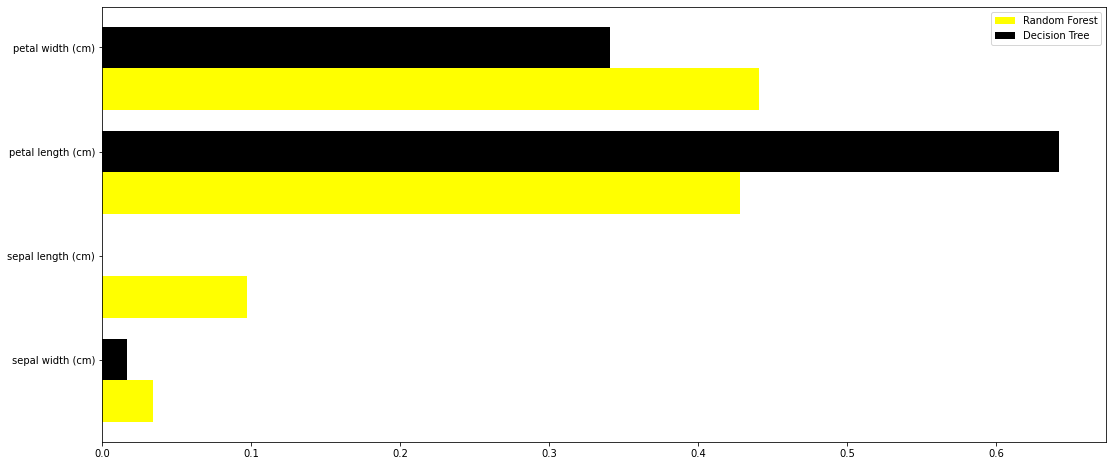

In [57]:
# feature importance comparison
feature_importance=pd.DataFrame({
    'rfc':forest_clf.feature_importances_,
    'dt':tree_clf.feature_importances_
}, index=iris.feature_names)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='yellow',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='black',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

* From the above graph:
The decision tree model gives high importance to a particular set of features but the random forest chooses features randomly during the training process.
* The random forest chooses features randomly during the training process.
* Therefore, it does not depend highly on any specific set of features.
* Random forest can generalize over the data in a better way thus makes random forest much more accurate than a decision tree.



## Use Cases

* This algorithm is widely used in E-commerce, banking, medicine, the stock market, etc.

## Advantages and Disadvantages of Random Forest Algorithm

### Advantages
1.  It can be used in classification and regression problems.

2. It solves the problem of overfitting as output is based on majority voting or averaging.

3. It performs well even if the data contains null/missing values.

4. Each decision tree created is independent of the other thus it shows the property of parallelization.

5. It is highly stable as the average answers given by a large number of trees are taken.

6. It maintains diversity as all the attributes are not considered while making each decision tree though it is not true in all cases.

7. It is immune to the curse of dimensionality. Since each tree does not consider all the attributes, feature space is reduced.

8. We don’t have to segregate data into train and test as there will always be 30% of the data which is not seen by the decision tree made out of bootstrap.

### Disadvantages

1. Random forest is highly complex when compared to decision trees where decisions can be made by following the path of the tree.

2. Training time is more compared to other models due to its complexity. Whenever it has to make a prediction each decision tree has to generate output for the given input data.

## Classification application

In [104]:
# Reading the csv file and putting it into 'df' object
df = pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [105]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)
# Putting response variable to y
y = df['heart disease']

In [106]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [107]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [108]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 304 ms, sys: 6.13 ms, total: 310 ms
Wall time: 355 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [109]:
# checking the oob score
classifier_rf.oob_score_

0.656084656084656

### Important Hyperparameters
Hyperparameters are used in random forests to either enhance the performance and predictive power of models or to make the model faster.

*Following hyperparameters increases the predictive power*:

1. **n_estimators**– number of trees the algorithm builds before averaging the predictions.

2. **max_features**– maximum number of features random forest considers splitting a node.

3. **mini_sample_leaf**– determines the minimum number of leaves required to split an internal node.

*Following hyperparameters increases the speed*:

1. **n_jobs**– it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor but if the value is -1 there is no limit.

2. **random_state**– controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and if it has been given the same hyperparameters and the same training data.

3. **oob_score** – OOB means out of the bag. It is a random forest cross-validation method. In this one-third of the sample is not used to train the data instead used to evaluate its performance. These samples are called out of bag samples.

In [110]:
# Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [111]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [112]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [113]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 4.4 s, sys: 189 ms, total: 4.59 s
Wall time: 1min 58s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [114]:
grid_search.best_score_

0.6985815602836879

In [115]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

* The best set of paramters identified were max_depth=5, min_samples_leaf=10, n_estimators=10

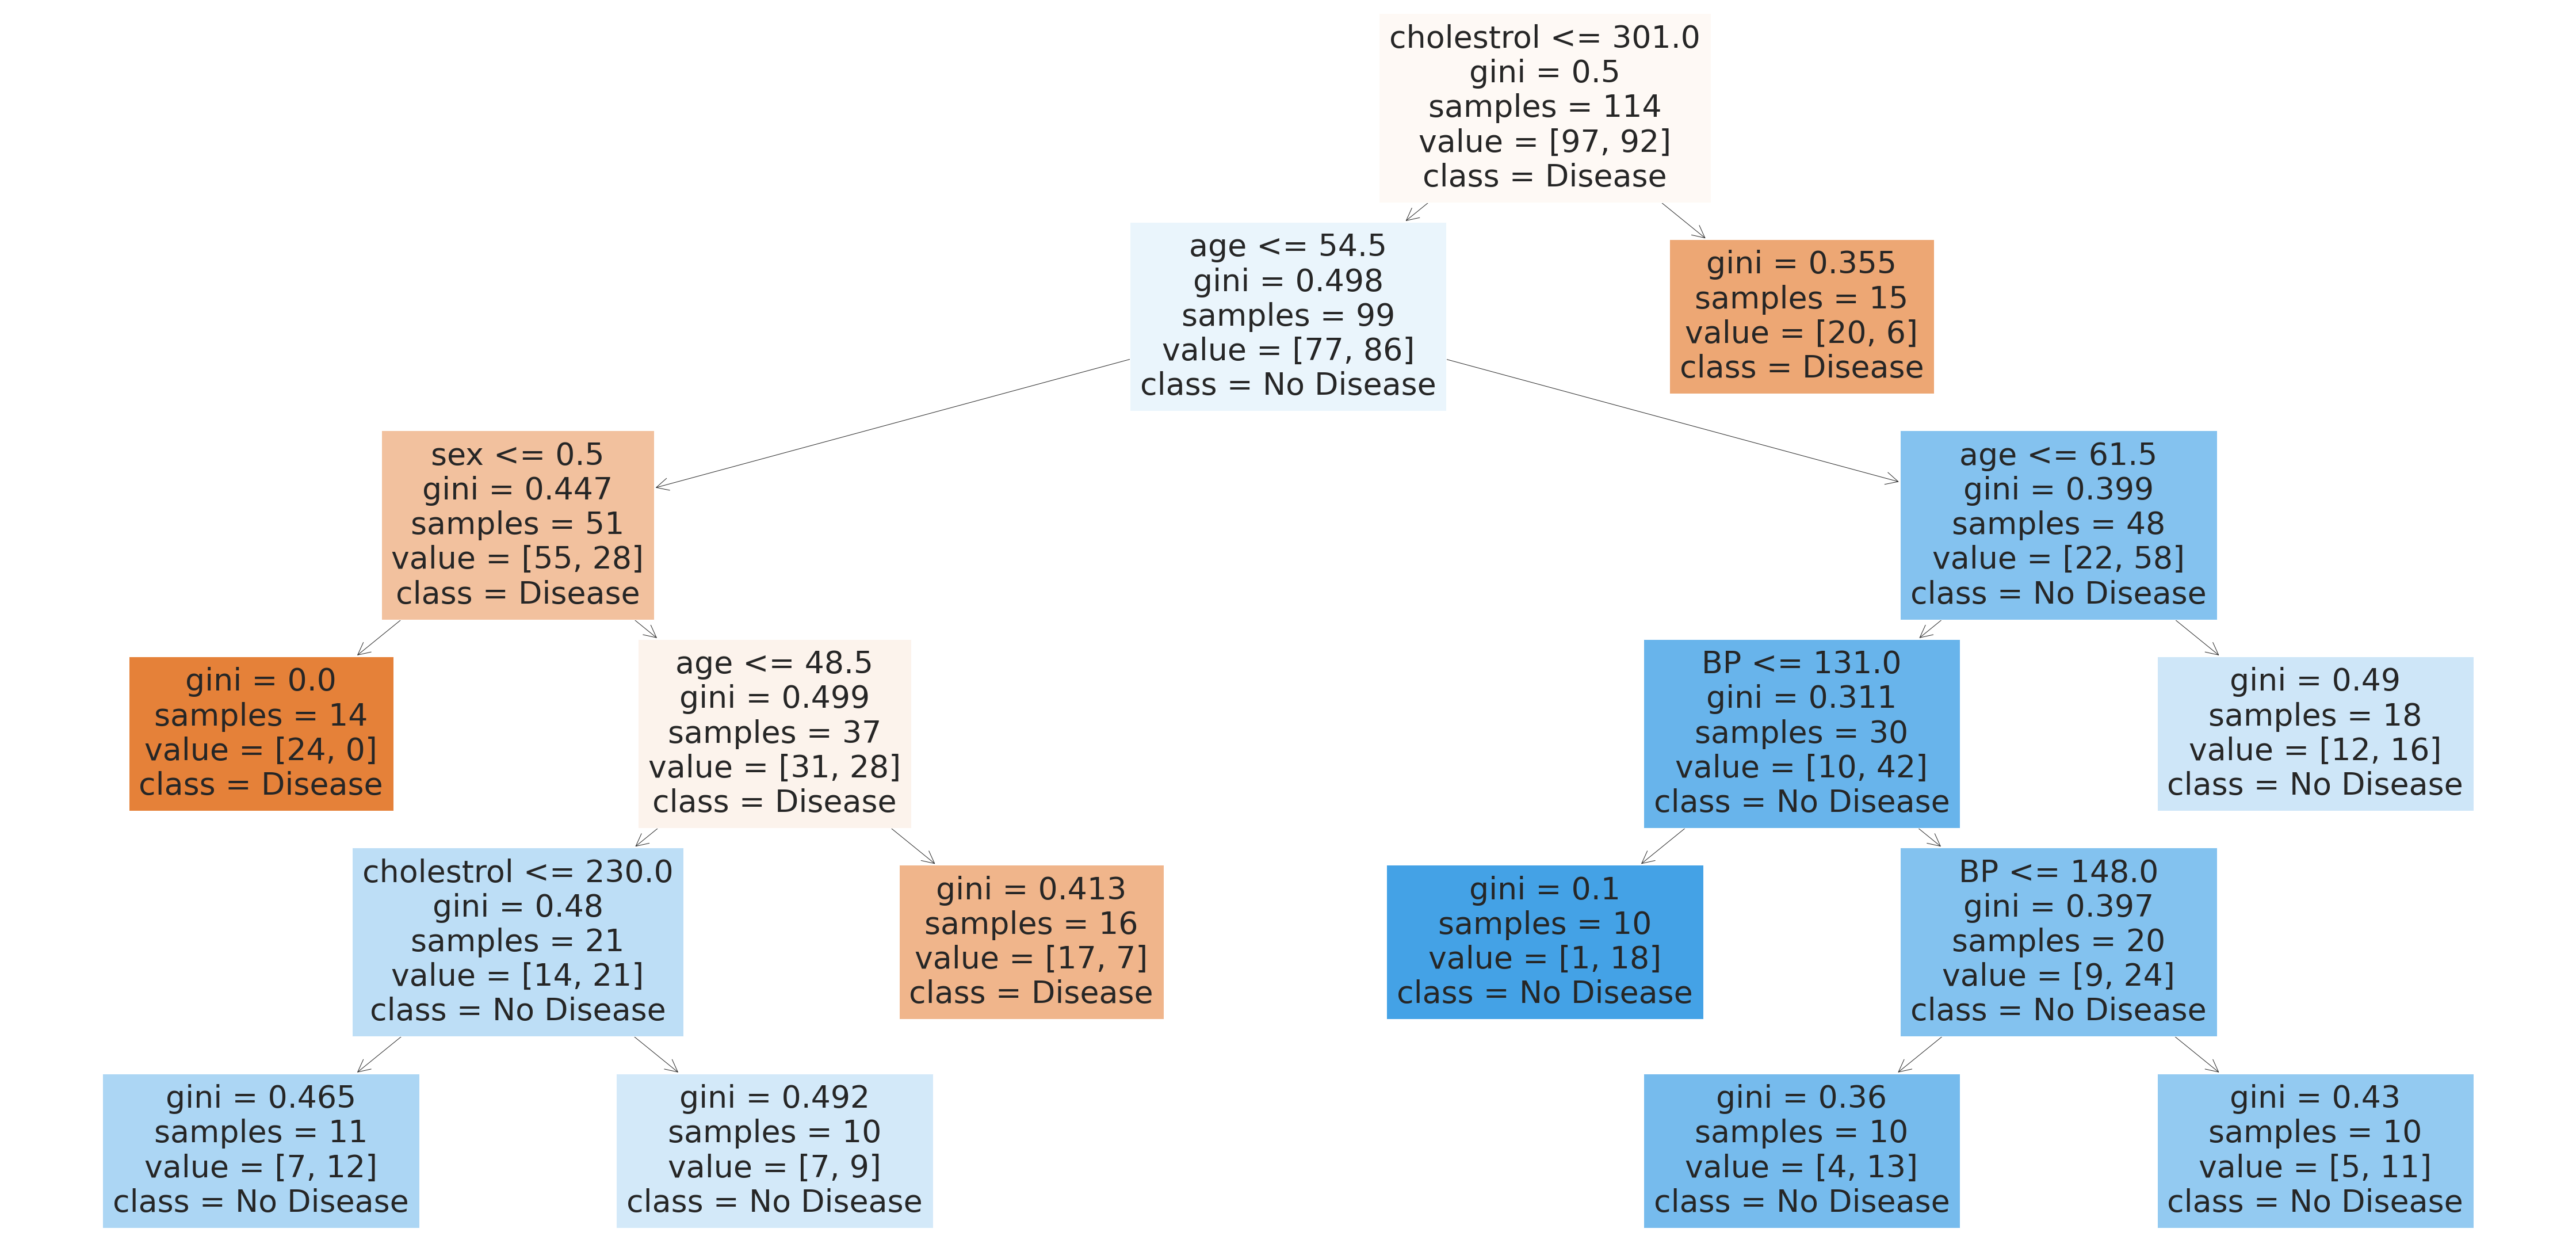

In [116]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);


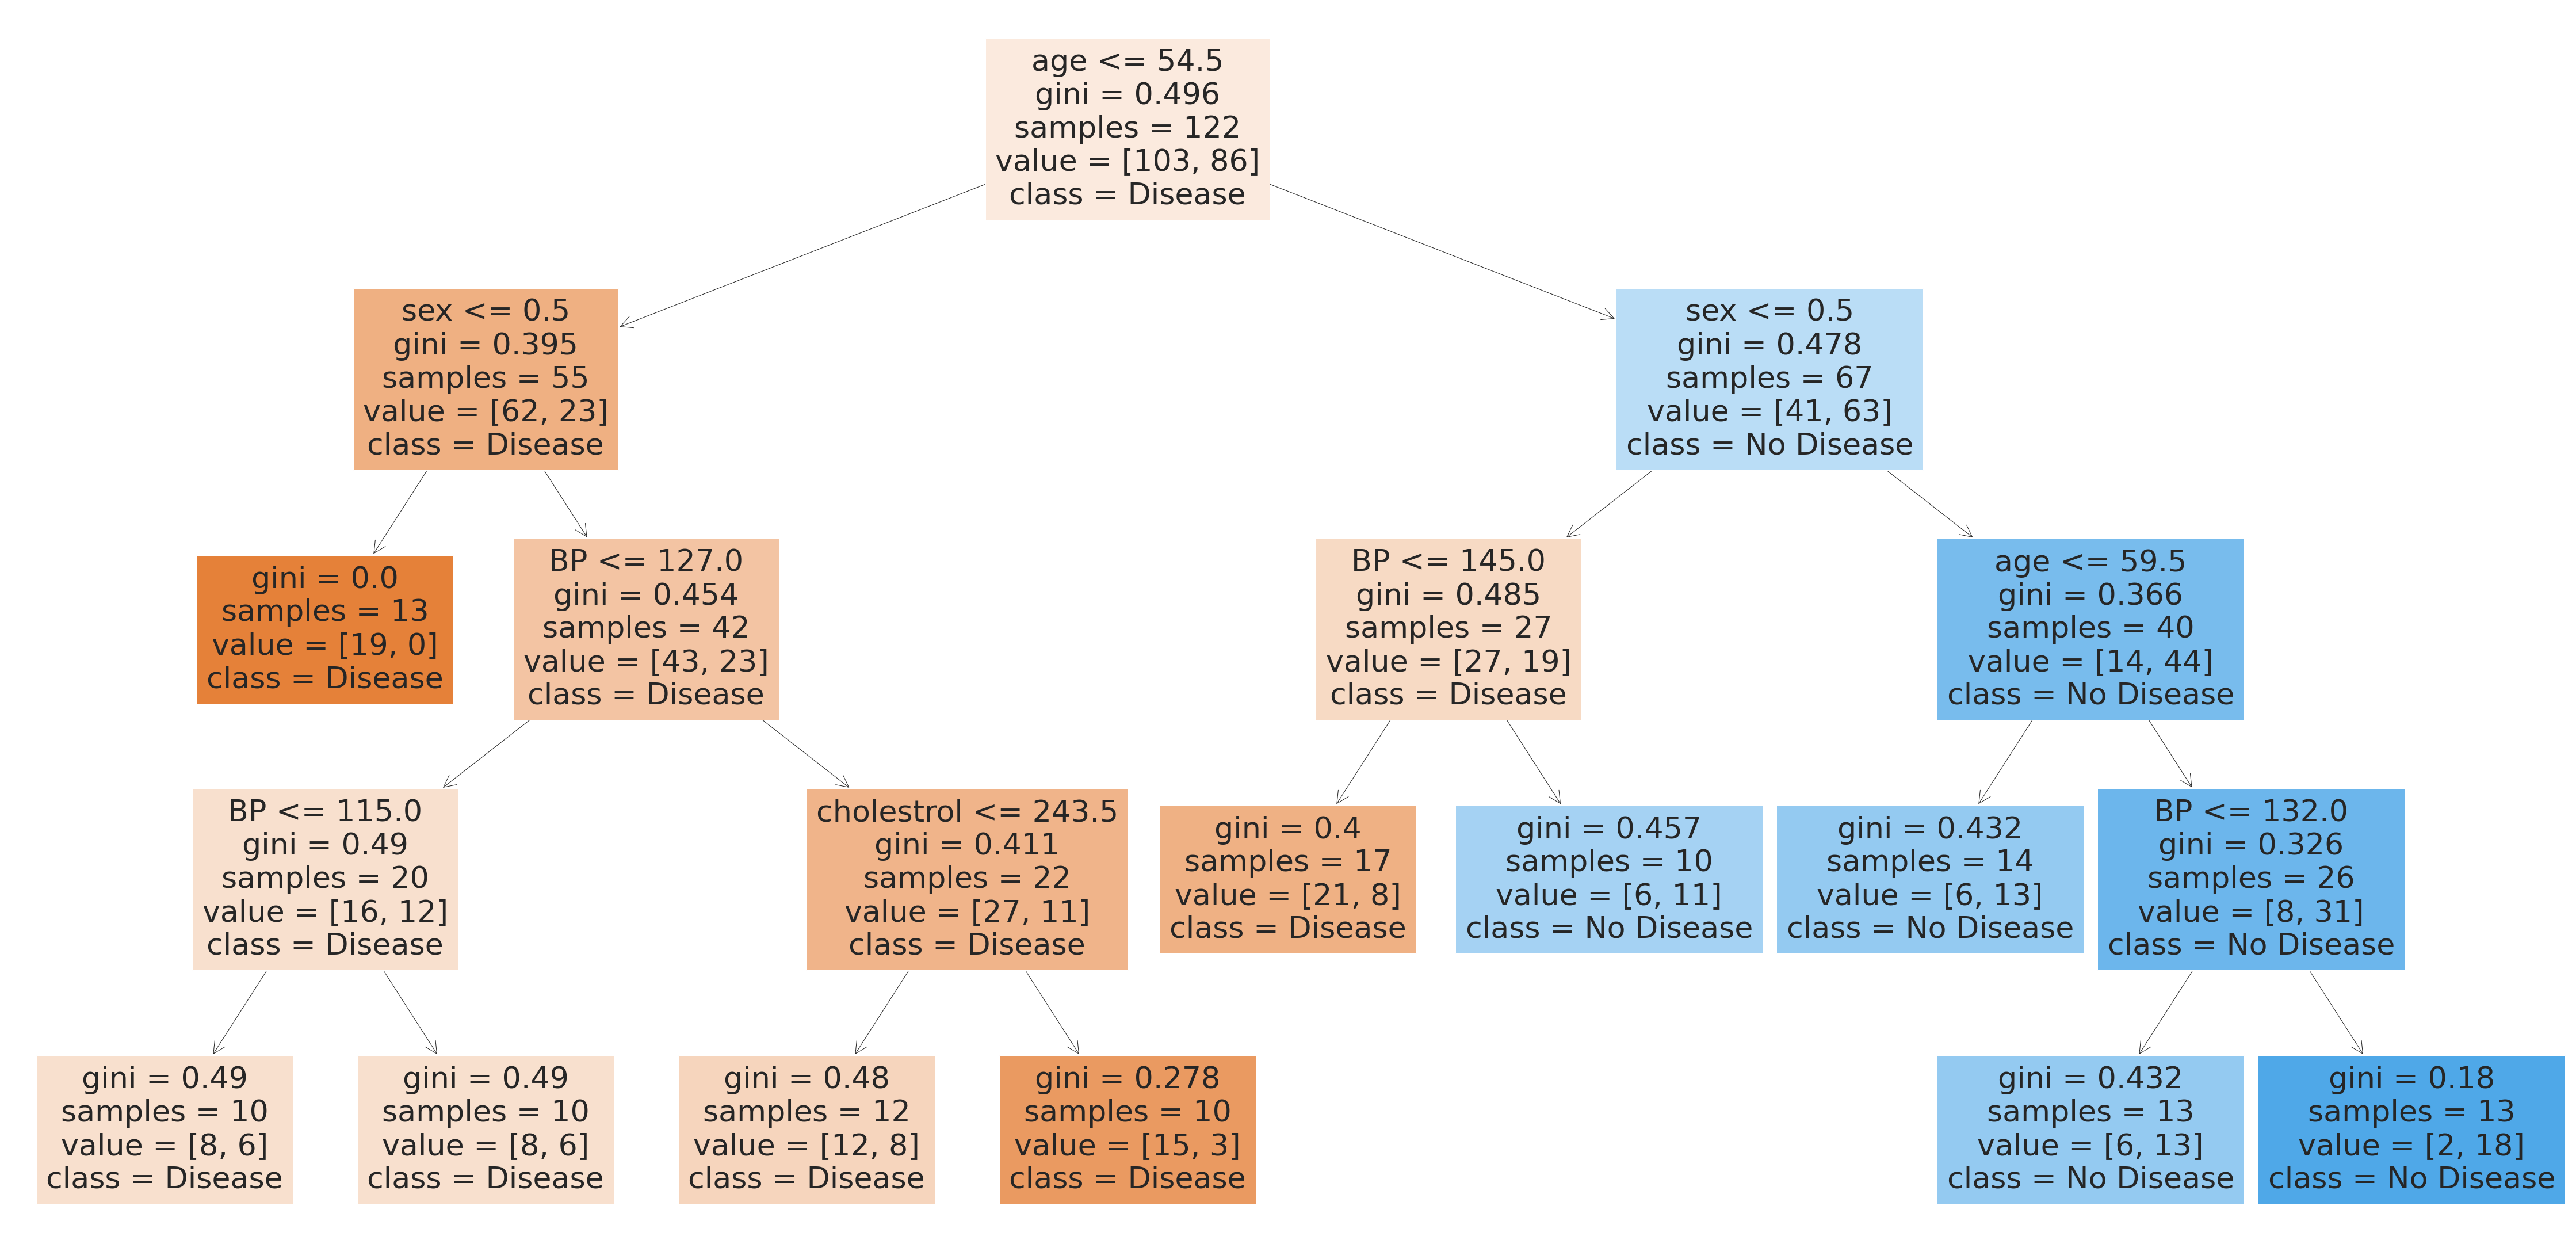

In [117]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

Trees created by estimators_[5] and estimators_[7] are different in appearance from the above visuals ie each tree is independent of the other.

In [118]:
# sort the data with the help of feature importance
rf_best.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [119]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [120]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746


## Regression Application

* **Dataset source**: You can download the dataset [here](https://www.kaggle.com/camnugent/california-housing-prices)
* **Dataset license**: This dataset comes under the CC0: Public Domain license. You can find more information on that type of license [here](https://creativecommons.org/publicdomain/zero/1.0/).
* **Dataset reference**: Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291–297.
* **Dataset description**: This dataset contains a total of 9 variables including the target. You can find the description of each variable [here](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

In [64]:
# load data
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [63]:
# brief decription about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* Check the relatioship between location and house value.

In [68]:
# use longitude and latitude to give location
X = df[['latitude', 'longitude']]
Y = df['median_house_value']

* Create variables to visualize the data

In [69]:
x=df['latitude']
y=df['longitude']
z=df['median_house_value']

* Using the variables, create a 3D scatter plot to see the relationship between house value and its location

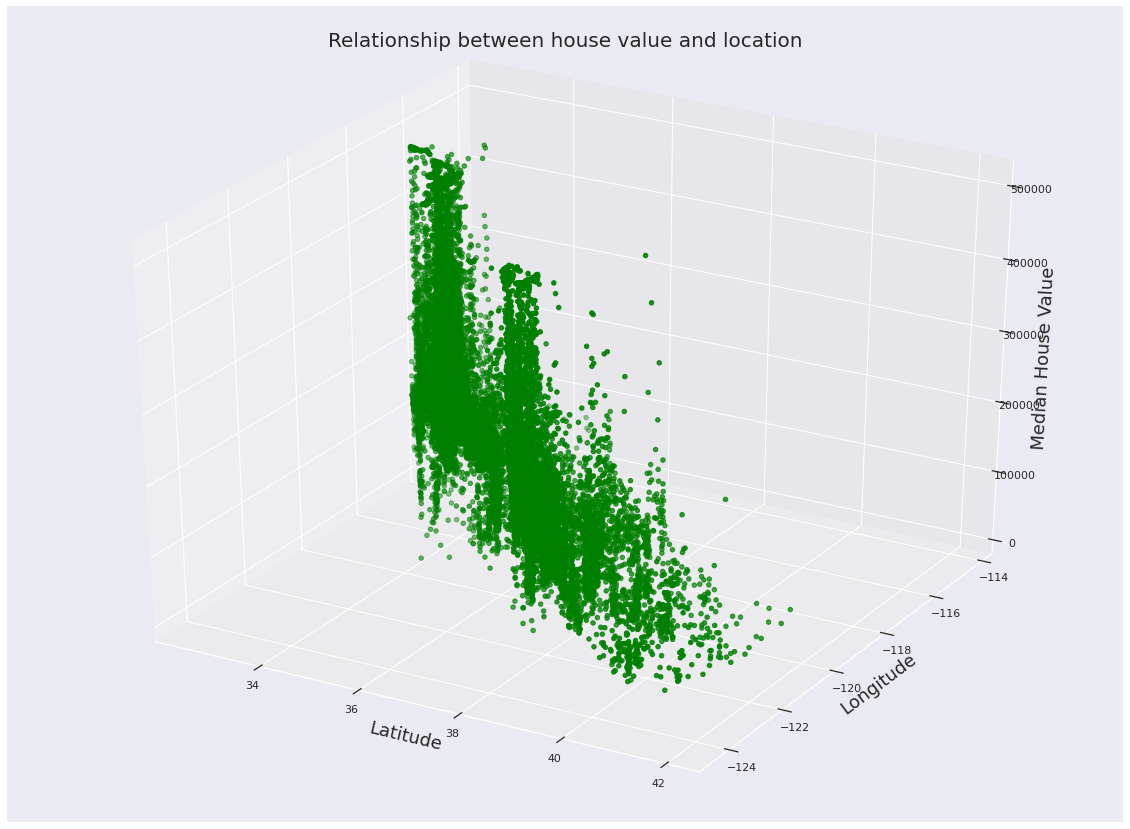

In [77]:
from numpy.ma.core import size
fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, color='green')
ax.set_title("Relationship between house value and location", pad=25, size=20)
ax.set_xlabel('Latitude', size=18) 
ax.set_ylabel('Longitude', size=18) 
ax.set_zlabel('Median House Value', size=18)

plt.savefig('3D Scatterplot.png')

* From the graph, the relationship is **complex** and **non-linear**.
* Random forests are extremely useful to model this type of non-linear relationship.

In [79]:
# build the base model
#Create an object (model)
rf = RandomForestRegressor(n_estimators=100, max_depth=2,
                           min_samples_split=2, random_state=1)

#Fit (train) the model
rf.fit(X, Y)

RandomForestRegressor(max_depth=2, random_state=1)

Let’s see how our model fits on the data.


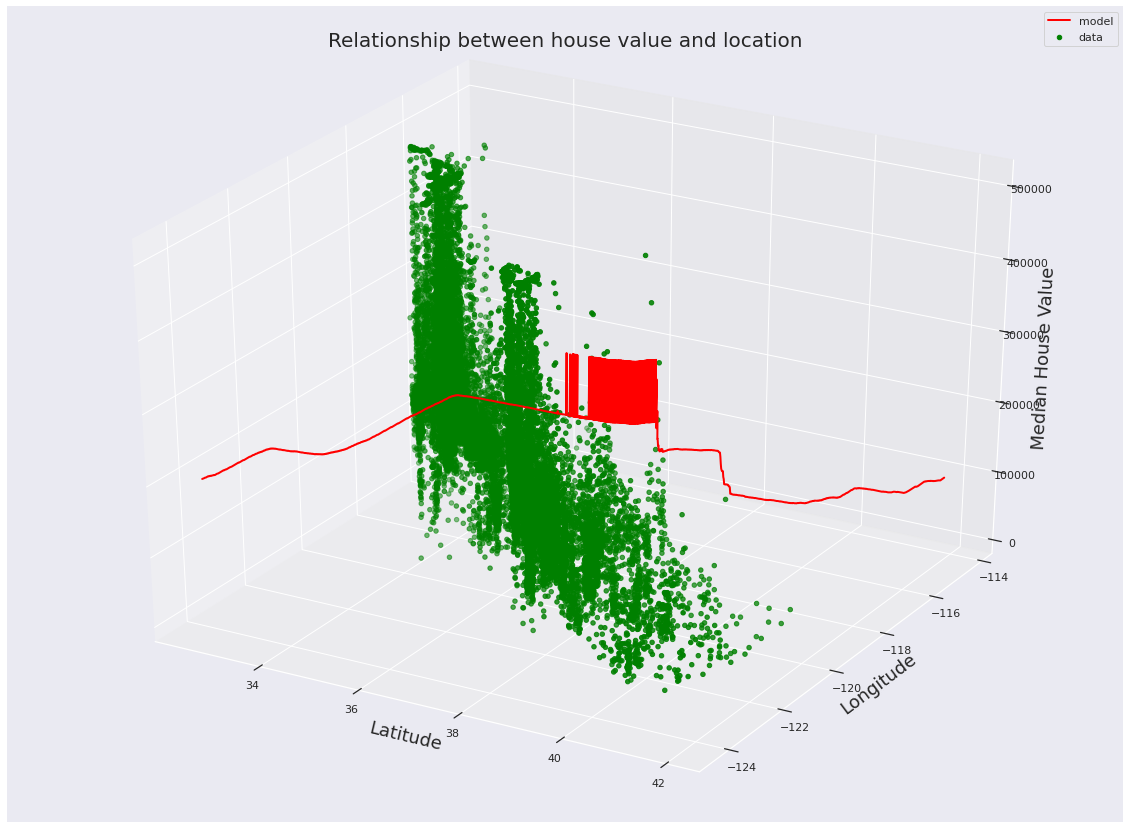

In [84]:
fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection='3d')

ax.scatter3D(x, y, z, color='green', label='data')
ax.set_title("Relationship between house value and location", pad=25, size=20)
ax.set_xlabel('Latitude', size=18) 
ax.set_ylabel('Longitude', size=18) 
ax.set_zlabel('Median House Value', size=18)

ax.plot3D(df['latitude'].sort_values(), df['longitude'].sort_values(),
          rf.predict(df[['latitude', 'longitude']].sort_values(by=['latitude', 'longitude'])),
          color='red', label='model', linewidth=2)

plt.legend()

plt.savefig('Base model.png')

* Base model does not fit well on the data because we haven’t tuned any hyperparameter yet.



In [89]:
# tune the model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10,
                                                    random_state=2,
                                                    shuffle=True)

from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor()

rs = RandomizedSearchCV(model, n_iter=10,
                        param_distributions = {'max_depth': range(1, 15),
                                               'min_samples_split': range(2, 50)},
                        cv=5, n_jobs=-1, random_state=3,
                        scoring='neg_mean_squared_error')

rs.fit(X_train, y_train)

print(rs.best_params_)
print(-rs.best_score_)

{'min_samples_split': 13, 'max_depth': 12}
3217482002.1190023


In [90]:
# rebuild the model

#Create an object (model)
rf = RandomForestRegressor(n_estimators=100, max_depth=12,
                           min_samples_split=13, random_state=1)

#Fit (train) the model
rf.fit(X, Y)

RandomForestRegressor(max_depth=12, min_samples_split=13, random_state=1)

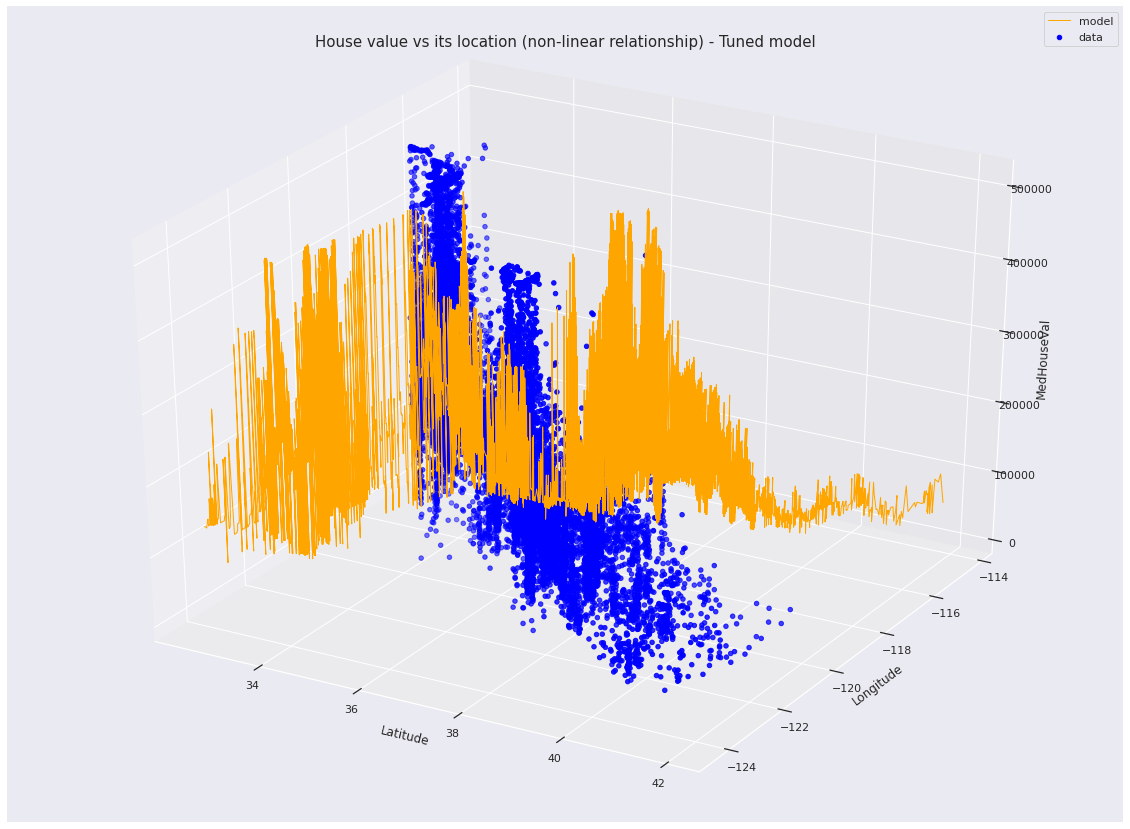

In [93]:

fig = plt.figure(figsize=(20, 15))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, color='blue', label='data')
ax.set_title("House value vs its location (non-linear relationship) - Tuned model", pad=25, size=15)
ax.set_xlabel('Latitude') 
ax.set_ylabel('Longitude') 
ax.set_zlabel('MedHouseVal')

ax.plot3D(df['latitude'].sort_values(), df['longitude'].sort_values(),
          rf.predict(df[['latitude', 'longitude']].sort_values(by=['latitude', 'longitude'])),
          color='orange', label='model', linewidth=1)

plt.legend()
plt.savefig('Tuned model.png')

* Since we are interested in how the house location affects to the house price, we only use the “Latitude” and “Longitude” variables in the dataset for our analysis.
* However, other variables in the dataset also affect the house price.
* Create the random forest model again by including all the variables in the dataset.